### Question 1: Data Extraction

In [1]:
import pandas as pd

In [2]:
import numpy as np 

In [3]:
import re

In [4]:
## read csv file
data = pd.read_csv('loss-circulation.csv'\
                 , sep=','\
                 , encoding='latin1'
                 )
data

,DM_EVENT.date_ops_start,DM_ACTIVITY.activity_code,DM_ACTIVITY.activity_memo
0,09/01/2014,C2,Drop top plug. Cmt unit displace with 20 bbls ...
1,09/01/2014,C2,Drop bottom plug. Mix and pump 28 m3 of 1.90 S...
2,09/01/2014,C2,Drop top plug. Cement unit displace cement wit...
3,09/01/2014,C2,Rig pump 1.59 m3 of base oil ahead and 1.78 SG...
4,09/01/2014,F1,"Cont drilling 6-1/8"" hole from 3121 m to 3130 ..."
5,09/01/2014,P4F,Install circulating head and hose. Circulate (...
6,09/01/2014,P4F,R/U cement bonnet. Remove BPV. R/U cement head...
7,09/01/2014,FN1C,Sweep hole with Lo-vis/Hi-dense pill. Circulat...
8,09/01/2014,FN1C,"Circulate bottom up (2000 lpm, 2600 psi). Tota..."
9,09/01/2014,G6,Remove radioactive source. L/D SlimXtreme. Max...


In [5]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6306 entries, 0 to 6305
Data columns (total 3 columns):
DM_EVENT.date_ops_start      1499 non-null object
DM_ACTIVITY.activity_code    1499 non-null object
DM_ACTIVITY.activity_memo    1499 non-null object
dtypes: object(3)
memory usage: 147.9+ KB


(6306, 3)

In [6]:
data_prep = data[data['DM_ACTIVITY.activity_memo'].notna()]
data_prep.head()

,DM_EVENT.date_ops_start,DM_ACTIVITY.activity_code,DM_ACTIVITY.activity_memo
0,09/01/2014,C2,Drop top plug. Cmt unit displace with 20 bbls ...
1,09/01/2014,C2,Drop bottom plug. Mix and pump 28 m3 of 1.90 S...
2,09/01/2014,C2,Drop top plug. Cement unit displace cement wit...
3,09/01/2014,C2,Rig pump 1.59 m3 of base oil ahead and 1.78 SG...
4,09/01/2014,F1,"Cont drilling 6-1/8"" hole from 3121 m to 3130 ..."


In [7]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 0 to 1498
Data columns (total 3 columns):
DM_EVENT.date_ops_start      1499 non-null object
DM_ACTIVITY.activity_code    1499 non-null object
DM_ACTIVITY.activity_memo    1499 non-null object
dtypes: object(3)
memory usage: 46.8+ KB


In [8]:
data_prep

,DM_EVENT.date_ops_start,DM_ACTIVITY.activity_code,DM_ACTIVITY.activity_memo
0,09/01/2014,C2,Drop top plug. Cmt unit displace with 20 bbls ...
1,09/01/2014,C2,Drop bottom plug. Mix and pump 28 m3 of 1.90 S...
2,09/01/2014,C2,Drop top plug. Cement unit displace cement wit...
3,09/01/2014,C2,Rig pump 1.59 m3 of base oil ahead and 1.78 SG...
4,09/01/2014,F1,"Cont drilling 6-1/8"" hole from 3121 m to 3130 ..."
5,09/01/2014,P4F,Install circulating head and hose. Circulate (...
6,09/01/2014,P4F,R/U cement bonnet. Remove BPV. R/U cement head...
7,09/01/2014,FN1C,Sweep hole with Lo-vis/Hi-dense pill. Circulat...
8,09/01/2014,FN1C,"Circulate bottom up (2000 lpm, 2600 psi). Tota..."
9,09/01/2014,G6,Remove radioactive source. L/D SlimXtreme. Max...


In [9]:
data_prep.describe()

,DM_EVENT.date_ops_start,DM_ACTIVITY.activity_code,DM_ACTIVITY.activity_memo
count,1499,1499,1499
unique,51,46,1494
top,06/06/2014,F1,"Circulate hole clean inside 13-3/8"" casing (34..."
freq,97,267,2


In [10]:
keyword = "[Ll][Oo][Ss][SsEe]+"
unit = "[Ll][Oo][Ss][SsEe]+ [.\d]+ (m3)"

def containing_word(w):
    x = re.search(keyword, str(w))
    if x:
        m = re.search(unit, str(w))
        if m:
            return float(re.search("[.\d]+", m.group()).group())
        else:
            return 0
    else:
        return 0

In [11]:
data_prep['LOSS_CIRCULATION'] = data_prep['DM_ACTIVITY.activity_memo'].apply(lambda x: containing_word(x))

C:\Users\RogAsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
data_prep

,DM_EVENT.date_ops_start,DM_ACTIVITY.activity_code,DM_ACTIVITY.activity_memo,LOSS_CIRCULATION
0,09/01/2014,C2,Drop top plug. Cmt unit displace with 20 bbls ...,0.00
1,09/01/2014,C2,Drop bottom plug. Mix and pump 28 m3 of 1.90 S...,6.20
2,09/01/2014,C2,Drop top plug. Cement unit displace cement wit...,15.26
3,09/01/2014,C2,Rig pump 1.59 m3 of base oil ahead and 1.78 SG...,5.00
4,09/01/2014,F1,"Cont drilling 6-1/8"" hole from 3121 m to 3130 ...",0.00
5,09/01/2014,P4F,Install circulating head and hose. Circulate (...,0.00
6,09/01/2014,P4F,R/U cement bonnet. Remove BPV. R/U cement head...,0.00
7,09/01/2014,FN1C,Sweep hole with Lo-vis/Hi-dense pill. Circulat...,3.60
8,09/01/2014,FN1C,"Circulate bottom up (2000 lpm, 2600 psi). Tota...",7.60
9,09/01/2014,G6,Remove radioactive source. L/D SlimXtreme. Max...,0.00


In [13]:
data_prep.to_csv('loss-circulation-transformed.csv')

## --------------------------------------------------------------------------------------------------------------------------------

### Question 2: Data Profiling

### - What are the some basic statistics (avg, var, max, min, %missing) of loss circulation?

In [15]:
data_prep[data_prep['LOSS_CIRCULATION']!=0].describe()

,LOSS_CIRCULATION
count,152.000000
mean,10.198533
std,17.302839
min,0.160000
25%,1.597500
50%,3.600000
75%,10.025000
max,102.600000


In [16]:
avg_loss = data_prep['LOSS_CIRCULATION'].sum()/data_prep['LOSS_CIRCULATION'].count()

In [17]:
print('Average of loss circulation: ', avg_loss)

Average of loss circulation:  1.0341407605070045


In [18]:
def cal_variance(loss_cir):
    sum_sq = 0
    for i in loss_cir.tolist():
        sum_sq += (i-avg_loss)**2       
    return sum_sq/data_prep['LOSS_CIRCULATION'].count()

In [19]:
print('Variance of loss circulation: ', cal_variance(data_prep['LOSS_CIRCULATION']))

Variance of loss circulation:  39.63579473468824


In [20]:
print('Maximum of loss circulation :', data_prep[data_prep['LOSS_CIRCULATION']>0].max())

Maximum of loss circulation : DM_EVENT.date_ops_start                                             30/06/2014
DM_ACTIVITY.activity_code                                                  P4F
DM_ACTIVITY.activity_memo    While clean out rat hole to 2146.5 m with 1800...
LOSS_CIRCULATION                                                         102.6
dtype: object


In [21]:
print('Minimum of loss circulation :', data_prep[data_prep['LOSS_CIRCULATION']>0].min())

Minimum of loss circulation : DM_EVENT.date_ops_start                                             01/07/2014
DM_ACTIVITY.activity_code                                                   C1
DM_ACTIVITY.activity_memo    At 2167 m, observe tight spot. Attempt to pass...
LOSS_CIRCULATION                                                          0.16
dtype: object


In [22]:
miss_loss = (len(data_prep[data_prep['LOSS_CIRCULATION']==0])/data_prep['LOSS_CIRCULATION'].count())

In [23]:
print('Missing percentage of loss circulation : ', miss_loss*100, '%')

Missing percentage of loss circulation :  89.85990660440294 %


### - Using visualization tools of choice, plot the distribution of loss circulation.

In [24]:
import numpy as np

In [25]:
import matplotlib.pyplot as plt

In [26]:
data_cnt = data_prep[data_prep['LOSS_CIRCULATION']>=0].groupby(['DM_ACTIVITY.activity_code'])['LOSS_CIRCULATION']\
                                                    .count().reset_index()
data_cnt = data_cnt.rename(columns={'LOSS_CIRCULATION':'LOSS_CIRCULATION_CNT'})

In [27]:
data_cnt_occ = data_prep[data_prep['LOSS_CIRCULATION']>0].groupby(['DM_ACTIVITY.activity_code'])['LOSS_CIRCULATION'].count().reset_index()
data_cnt_occ = data_cnt_occ.rename(columns={'LOSS_CIRCULATION':'LOSS_CIRCULATION_cnt_occur'})

In [28]:
data_all = data_cnt.merge(data_cnt_occ, how='inner', on='DM_ACTIVITY.activity_code')\
                            .sort_values('DM_ACTIVITY.activity_code', ascending=True).reset_index()

In [29]:
data_all['percentage_to_occur'] = (data_all['LOSS_CIRCULATION_cnt_occur']/data_all['LOSS_CIRCULATION_CNT'])*100
data_result = data_all.sort_values('percentage_to_occur', ascending=False)
data_result

,index,DM_ACTIVITY.activity_code,LOSS_CIRCULATION_CNT,LOSS_CIRCULATION_cnt_occur,percentage_to_occur
4,4,CN2,3,3,100.000000
16,16,FN3,13,10,76.923077
14,14,FN1C,5,3,60.000000
5,5,CN7,2,1,50.000000
8,8,F2A,43,15,34.883721
10,10,F2C,9,3,33.333333
7,7,F10,3,1,33.333333
13,13,FN1A,15,4,26.666667
15,15,FN2,84,20,23.809524
1,1,C1A,17,4,23.529412


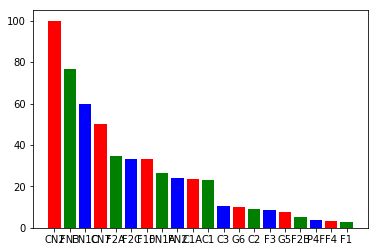

In [30]:
x = data_result['DM_ACTIVITY.activity_code'].values.tolist()
y = data_result['percentage_to_occur'].values.tolist()
plt.bar(x,y)
plt.bar(x,y, color='rgb')
plt.show()

### - What are the top 3 activity codes from which loss circulation occurs the most?

In [31]:
data_loss= data_prep.groupby('DM_ACTIVITY.activity_code')['LOSS_CIRCULATION'].count()\
                                                    .sort_values(ascending=False).reset_index()

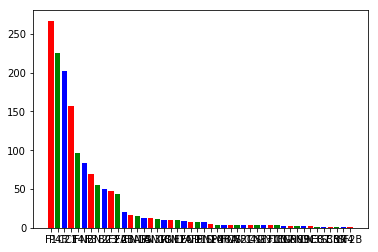

<Figure size 14400x7200 with 0 Axes>

In [32]:
x = data_loss['DM_ACTIVITY.activity_code'].values
y = data_loss['LOSS_CIRCULATION'].values
plt.bar(x,y, color='rgb')
plt.figure(figsize=(200,100))
plt.show()

In [33]:
top_loss= data_prep.groupby('DM_ACTIVITY.activity_code')['LOSS_CIRCULATION'].count()\
                                                    .sort_values(ascending=False).reset_index()[:3]

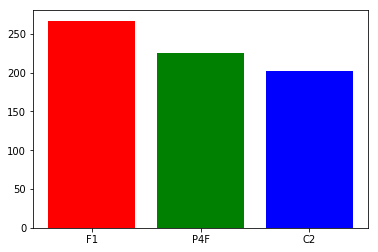

In [34]:
x = top_loss['DM_ACTIVITY.activity_code'].values
y = top_loss['LOSS_CIRCULATION'].values
plt.bar(x,y, color='rgb')
plt.show()

** The top 3 the most activity codes have occurred are F1, P4F, and C2.